In [28]:
import os
import math
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.optimize import curve_fit

In [29]:
# Import data

path = r"/Users/murilo/Documents/Unicamp/F 839/4o Exp/"

dataset = pd.read_csv(path + 'Dados.csv', sep = ',', header = 1).values

pos_int_laser = dataset[:40,0] # POSição na parte de perfil de INTensidade com fenda próxima do LASER
int_int_laser = dataset[:40,1] # INTensidade na parte de perfil de INTensidade com fenda próxima do LASER
pos_int_meio = dataset[:67,3]  # POSição na parte de perfil de INTensidade com fenda próxima do MEIO
int_int_meio = dataset[:67,4]  # INTensidade na parte de perfil de INTensidade com fenda próxima do MEIO
pos_int_diodo = dataset[:77,6] # POSição na parte de perfil de INTensidade com fenda próxima do fotoDIODO
int_int_diodo = dataset[:77,7] # INTensidade na parte de perfil de INTensidade com fenda próxima do fotoDIODO

pos = [pos_int_laser, pos_int_meio, pos_int_diodo]
p_int = [int_int_laser, int_int_meio, int_int_diodo]

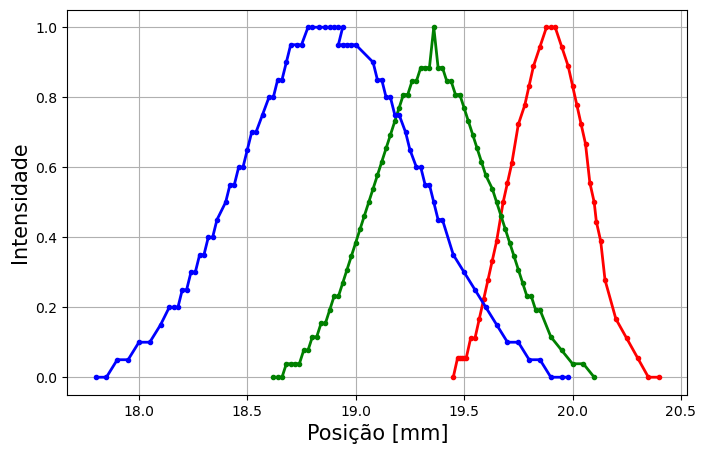

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
lw = 2
color = ['r', 'g', 'b']

# Plot the lines on top of the image
for i in range(0, len(pos)):
    ax.plot(pos[i], p_int[i]/max(p_int[i]), '.-', c = color[i],  linewidth = lw)

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.show()

In [31]:
# Define function to use as base of the adjustment
def fit(x, I0, r, w0):
    return I0 * np.exp(- 2 * ((x - r) / w0) ** 2)

# Define lists to add optmal parameters and the covariances
popt = [0, 0, 0]
pcov = [0, 0, 0]

# Define inicial guesses
I0 = [18, 23, 20]
r = [19.89, 19.36, 18.86]
w0 = [0.34, 0.55, 1]

# Fit the curve
for i in range(0, 3):
    popt[i], pcov[i] = curve_fit(fit, pos[i], p_int[i], p0=[I0[i], r[i], w0[i]])
    
    # Print results
    print('--------', i)
    print('Parâmetros ajustados (I0,r,w0)')
    print(popt[i])
    print('\nMatrix de covariância')
    print(pcov[i])
    print('\nErro')
    perr = np.sqrt(np.diag(pcov[i]))
    print(perr)



-------- 0
Parâmetros ajustados (I0,r,w0)
[18.02375797 19.89326444  0.34457019]

Matrix de covariância
[[ 1.93233239e-02 -1.43913956e-05 -2.56659340e-04]
 [-1.43913956e-05  2.16469218e-06  3.25118159e-07]
 [-2.56659340e-04  3.25118159e-07  9.37423231e-06]]

Erro
[0.13900836 0.00147129 0.00306174]
-------- 1
Parâmetros ajustados (I0,r,w0)
[23.3556677  19.35370184  0.53793013]

Matrix de covariância
[[ 1.41769112e-02 -2.88678179e-06 -2.28896134e-04]
 [-2.88678179e-06  2.56382701e-06  2.79774998e-07]
 [-2.28896134e-04  2.79774998e-07  1.08748830e-05]]

Erro
[0.11906683 0.0016012  0.00329771]
-------- 2
Parâmetros ajustados (I0,r,w0)
[20.07555583 18.87680288  0.8048079 ]

Matrix de covariância
[[ 6.42679398e-03 -4.40384331e-06 -1.96463521e-04]
 [-4.40384331e-06  3.80807328e-06  9.13766390e-07]
 [-1.96463521e-04  9.13766390e-07  1.75585317e-05]]

Erro
[0.08016729 0.00195143 0.00419029]


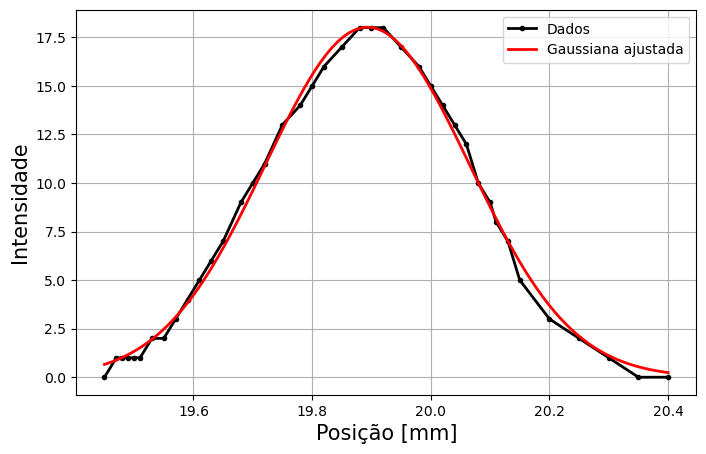

In [32]:
# Import data 
x = pos[0]
y = p_int[0]
I0_opt,r_opt,w0_opt = ['','',''],['','',''],['','','']

# Import optimal model
I0_opt[0], r_opt[0], w0_opt[0] = popt[0]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[0], r_opt[0], w0_opt[0])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.-', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'r',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

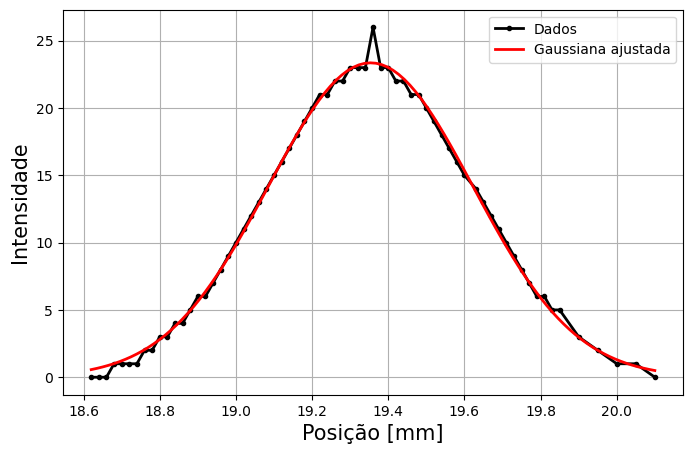

In [33]:
# Import data 
x = pos[1]
y = p_int[1]

# Import optimal model
I0_opt[1], r_opt[1], w0_opt[1] = popt[1]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[1], r_opt[1], w0_opt[1])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.-', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'r',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

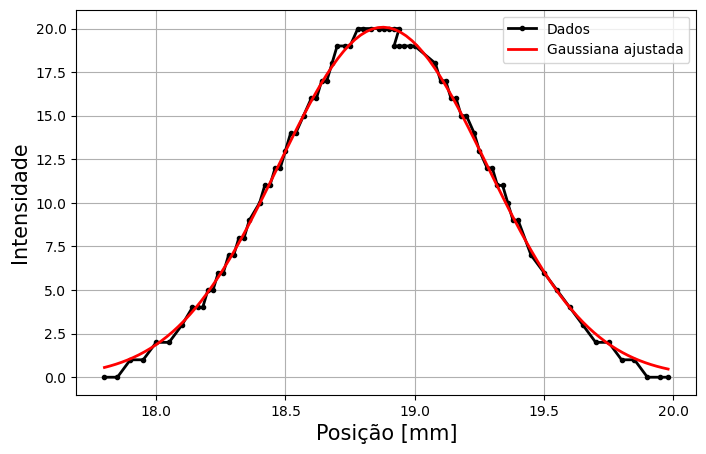

In [34]:
# Import data 
x = pos[2]
y = p_int[2]

# Import optimal model
I0_opt[2], r_opt[2], w0_opt[2] = popt[2]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[2], r_opt[2], w0_opt[2])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.-', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'r',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

# Knife Edge

In [35]:
def D(pos_90, pos_10):
    return 1.561*np.absolute(pos_90 - pos_10)/2

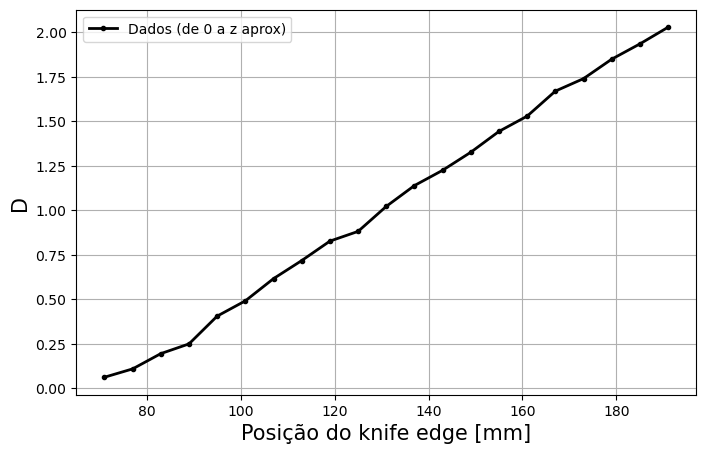

In [36]:
pos_90 = dataset[:21,9] # Posição da gilette em 90%
pos_10 = dataset[:21,10] # Posição da knife edge em 10%
pos_knife = dataset[:21,12] # Posição do knife edge

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos_knife, D(pos_90, pos_10), '.-', c = 'k',  linewidth = lw, label = 'Dados (de 0 a z aprox)')

# Set the axis labels and limits
ax.set_ylabel('D', size=15)
ax.set_xlabel('Posição do knife edge [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

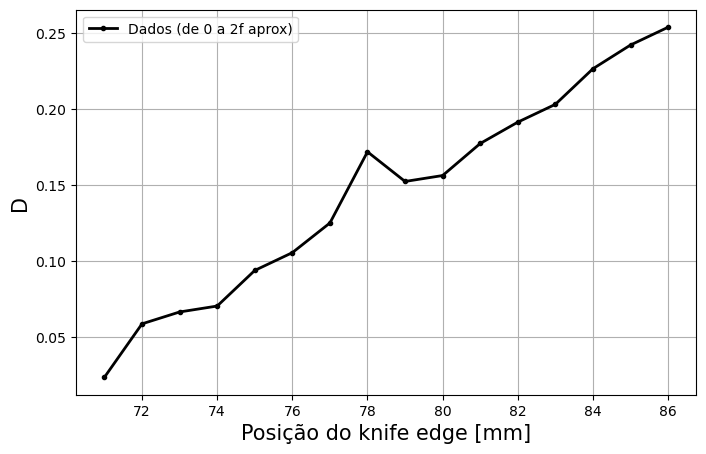

In [37]:
pos2_90 = y = dataset[:16,14].astype(float) # Posição da gilette em 90%
pos2_10 = np.asarray(dataset[:16,15]) # Posição da knife edge em 10%
pos2_knife = np.asarray(dataset[:16,17]) # Posição do knife edge

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos2_knife, D(pos2_90, pos2_10)/100, '.-', c = 'k',  linewidth = lw, label = 'Dados (de 0 a 2f aprox)')

# Set the axis labels and limits
ax.set_ylabel('D', size=15)
ax.set_xlabel('Posição do knife edge [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

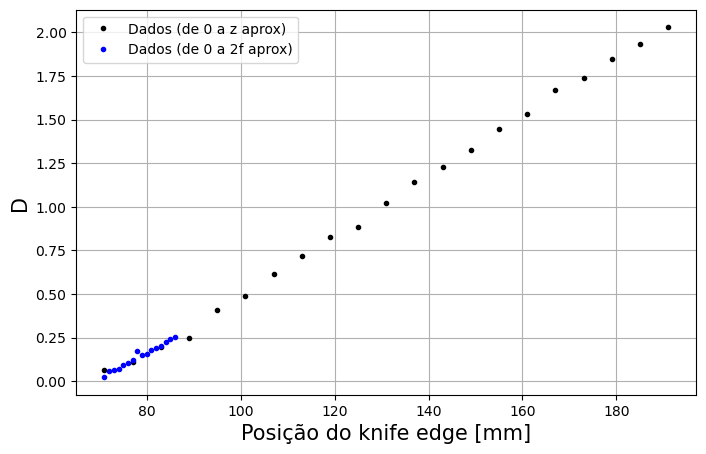

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos_knife, D(pos_90, pos_10), '.', c = 'k',  linewidth = lw, label = 'Dados (de 0 a z aprox)')
ax.plot(pos2_knife, D(pos2_90, pos2_10)/100, '.', c = 'b',  linewidth = lw, label = 'Dados (de 0 a 2f aprox)')

# Set the axis labels and limits
ax.set_ylabel('D', size=15)
ax.set_xlabel('Posição do knife edge [mm]', size=15)
# ax.set_xlim(70, 105)
# ax.set_ylim(0, 0.5)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

In [57]:
def omega(z, z0, w0):
    return w0 * np.sqrt(1 + (z / z0) ** 2)

# Fit the curve
DDD = D(pos2_90, pos2_10)/100
popt, pcov = curve_fit(omega, pos2_knife, DDD, p0=[1, 1])
    
# Print results
print('Parâmetros ajustados')
print(popt)
print('\nMatrix de covariância')
print(pcov)
print('\nErro')
perr = np.sqrt(np.diag(pcov))
print(perr)


Parâmetros ajustados
[2.29323240e-03 4.32841488e-06]

Matrix de covariância
[[8.15830815e+08 1.53983827e+06]
 [1.53983827e+06 2.90636472e+03]]

Erro
[28562.75223889    53.91071066]


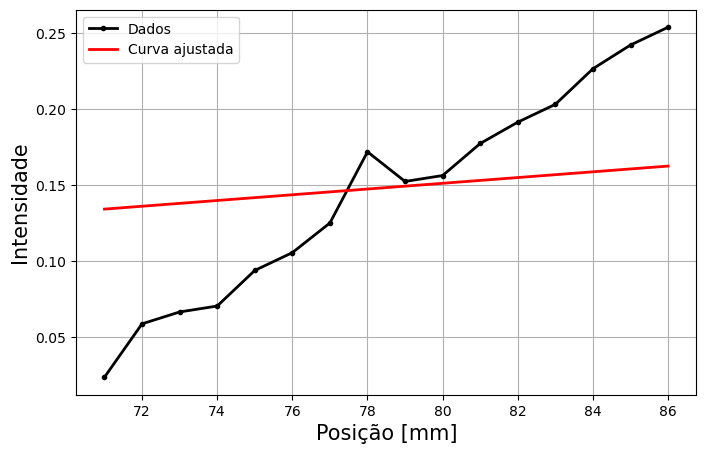

In [58]:
# Import data 
x = pos2_knife
y = D(pos2_90, pos2_10)/100

# Import optimal model
z0_opt, w0_opt = popt
x_model = np.linspace(min(x), max(x), 100)
y_model = omega(x_model, z0_opt, w0_opt)

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.-', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'r',  linewidth = lw, label = 'Curva ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()